# Visualizing Neural Net outputs

In [1]:
import pandas as pd
import numpy as np 

from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy import stats
from scipy.spatial.distance import pdist

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from itertools import cycle

import string

from collections import Counter

import itertools

import seaborn as sns

from cycler import cycler

## Importing the data

In [2]:
activations = np.load('Data/activations.npy')
valid = pd.read_csv('Data/LSTM_valid.csv')
len(valid.movieId), activations.shape 

(19937, (19937, 50))

In [3]:
activations

array([[ 0.02599826, -0.01904785, -0.01538942, ...,  0.10811126,
        -0.11186317,  0.02357017],
       [-0.09082906,  0.24296407,  0.15772353, ...,  0.27215058,
         0.16067997, -0.1762509 ],
       [-0.0500398 ,  0.14596513,  0.09020989, ...,  0.21525469,
         0.05053646, -0.09562436],
       ..., 
       [-0.00908212, -0.02466193, -0.00613284, ..., -0.02309125,
        -0.00852309,  0.01506194],
       [ 0.05215181, -0.07832805, -0.03453331, ..., -0.0685018 ,
        -0.05023125,  0.07030026],
       [-0.0503426 ,  0.04737845,  0.03311294, ...,  0.02036675,
         0.04578586, -0.01441868]], dtype=float32)

I want to turn activations into a 19908 by 1 matrix, where each element is a value between 0 and 80. I basically want t group each row into which node they most activate.  

In [4]:
Most_active_axis1 = np.argmax(np.abs(activations), axis = 1)
Most_active_axis1.shape

(19937,)

In [5]:
movies = np.sort(valid.movieId.unique())
movies.shape

(4896,)

In [6]:
movies

array([   0,    1,    2, ..., 9054, 9061, 9063])

Now, for every movie I want to get the node most activated by it

In [36]:
movie_nodes = []
for i in movies:
    max_nodes = []
    max_nodes.append(Most_active_axis1[valid.movieId == i])
    movie_nodes.append(stats.mode(max_nodes, axis = None)[0][0])

In [8]:
len(movie_nodes)

4896

Now, I want to group each movie, so that I get a list of arrays (the list has length 80) containing the movie indices in each node. 

In [9]:
clusters_axis1 = []
for i in np.unique(movie_nodes):
    ind_cluster = []
    clusters_axis1.append(movies[np.where(np.asarray(movie_nodes)==i)])

In [29]:
num = 0 
for i in range(len(clusters_axis1)):
    num += len(clusters_axis1[i])
    
print num

4896


In [55]:
clusters_axis1[0], clusters_axis1[1]

(array([   8,   62,  152,  249,  269,  640,  723,  848,  885, 1004, 1248,
        1396, 1402, 1635, 1666, 2125, 2188, 2208, 2228, 2374, 2450, 2471,
        2539, 2544, 2602, 2671, 2916, 3047, 3119, 3281, 3301, 3334, 3370,
        3373, 3377, 3572, 3595, 3613, 3664, 3747, 4228, 4265, 4271, 4376,
        4387, 4422, 4456, 4464, 4503, 4645, 4655, 4731, 4767, 4850, 5229,
        5395, 5470, 5493, 5593, 5605, 5704, 5708, 5709, 6321, 6585, 6855,
        7476, 7592, 7596, 7597, 7598, 7783, 8521]),
 array([  98,  175,  254,  295,  430,  440,  759,  811,  954, 1020, 1106,
        1144, 1317, 1323, 1373, 1453, 1822, 1849, 1972, 2145, 2242, 2332,
        2370, 2395, 2511, 2535, 2547, 2548, 2659, 2694, 2734, 2828, 3075,
        3368, 3619, 3625, 3633, 3667, 3736, 4208, 4210, 4435, 4437, 4519,
        4580, 4591, 4665, 4847, 4920, 5379, 6799, 6869, 7486, 8428]))

In [57]:
unique_clusters =[]
for i in range(len(clusters_axis1)):
    cluster_set = list(set(clusters_axis1[i]))
    for z in range(len(cluster_set)): 
        unique_clusters.append(cluster_set[z])
print len(unique_clusters)

4896


## Another way to look at this is to consider which movies maximally activate a node

To do this, I want to take the maximum along the **columns** instead of the rows. 

In [10]:
clusters_axis0 = []
for i in range(activations.shape[1]):
    ind = np.argpartition(activations[:,i], -20)[-20:]
    clusters_axis0.append(np.unique(np.asarray(valid.movieId)[ind]))

In [11]:
clusters_axis0 = np.asarray(clusters_axis0)

In [12]:
len(clusters_axis0)

50

I now have the indices of the movies which maximally activate each node. 

## Getting the original data

In [13]:
org_ratings = pd.read_csv('ratings.csv')
org_movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
org_ratings.head(), org_movies.head(), tags.head()

(   userId  movieId  rating   timestamp
 0       1       31     2.5  1260759144
 1       1     1029     3.0  1260759179
 2       1     1061     3.0  1260759182
 3       1     1129     2.0  1260759185
 4       1     1172     4.0  1260759205,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId                      tag   timestamp
 0      15      339  sandra 'boring' bullock  1138537770
 1      15     1955                 

In [14]:
orgid_movies = org_ratings.movieId.unique()
orgid_users = org_ratings.userId.unique()
orgid_ratings = org_ratings.rating.unique()

In [15]:
userid2idx = {o:i for i,o in enumerate(orgid_users)}
movieid2idx = {o:i for i,o in enumerate(orgid_movies)}

#Now, if I want to go back from a continuous index to the original one, I also define a function to do that
movieidx2id = {i:o for i,o in enumerate(orgid_movies)}

In [16]:
new_ratings = org_ratings.copy()

new_ratings.movieId = org_ratings.movieId.apply(lambda x: movieid2idx[x])
new_ratings.userId = org_ratings.userId.apply(lambda x: userid2idx[x])

Awesome; that was easy! 

Now, onto clustering. 

## Reducing Data Dimensionality

Reduce the dimensions of the data, from 6710 dimensions to 50 using PCA 

In [17]:
X_50_iter5000 = np.load('X_50_iter5000.npy')

In [18]:
def genre_diff(cluster_genres, total_genres):
    #This method returns the difference in genres between a cluster and the mean
    cluster_genres_only = np.asarray([i[0] for i in cluster_genres])
    total_genres_only = np.asarray([i[0] for i in total_genres])

    dif = []
    for i in range(len(cluster_genres)):
        if cluster_genres_only[i] != total_genres_only[i]:
            dif.append((i, np.argwhere(total_genres_only ==  cluster_genres_only[i])[0][0], cluster_genres_only[i]))
    return dif


In [19]:
#Get data about the entire dataset. 

reduced_X = X_50_iter5000

id = [i for i in xrange(len(reduced_X))]
sliced_X = np.insert(reduced_X, 0, id, axis=1)
total_genres = []
genres = []
mode_genres = []
total_years = []
total_ratings = []
for i in range(len(sliced_X)): 
    new_movie_id = sliced_X[i][0]
    # first step is finding the movie id 
    old_movie_id = movieidx2id[new_movie_id]
    old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
    # I have the genres at org_movies.genres[old_movie_index]
    #now I want to split it up based on the | character
    title = org_movies.title[old_movie_index]
    movie_genres = org_movies.genres[old_movie_index].split('|')
    year = title[title.find("(")+1:title.find(")")]
    total_ratings.append(new_ratings.rating[new_ratings.movieId == new_movie_id].mean())
    for k in range(len(movie_genres)):
        genres.append(movie_genres[k])  
    if (year.isdigit()):
        total_years.append(int(year))  
        
words_to_count = genres
total_genres = Counter(words_to_count).most_common()
print total_genres,  np.asarray(total_years).mean(), np.asarray(total_ratings).mean()

[('Drama', 4328), ('Comedy', 3307), ('Thriller', 1717), ('Action', 1543), ('Romance', 1541), ('Adventure', 1116), ('Crime', 1092), ('Horror', 872), ('Sci-Fi', 791), ('Fantasy', 653), ('Children', 582), ('Mystery', 537), ('Documentary', 487), ('Animation', 447), ('Musical', 394), ('War', 366), ('Western', 168), ('IMAX', 153), ('Film-Noir', 121), ('(no genres listed)', 17)] 1991.873738 3.29205425251


In [25]:
for i in range(len(clusters_axis0)): 
    
    cluster = clusters_axis0[i]
    
    #Now, I want to get all the information about the clusters
    ratings = []
    genres = []
    years = []
    titles = []
    given_tags = []
    for z in cluster: 
        new_movie_id = z
        # first step is finding the movie id 
        old_movie_id = movieidx2id[new_movie_id]
        old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
        # I have the genres at org_movies.genres[old_movie_index]
        #now I want to split it up based on the | character
        title = org_movies.title[old_movie_index]
        movie_genres = org_movies.genres[old_movie_index].split('|')
        year = title[title.find("(")+1:title.find(")")]
        titles.append(title)
        ratings.append(new_ratings.rating[new_ratings.movieId == new_movie_id].mean())
        for i in range(len(np.asarray(tags.tag)[np.where(tags.movieId == old_movie_id)])):
            given_tags.append(np.asarray(tags.tag)[np.where(tags.movieId == old_movie_id)][i])    
        for k in range(len(movie_genres)):
            genres.append(movie_genres[k])  
        if (year.isdigit()):
            years.append(int(year))  

    words_to_count = genres
    cluster_genres = Counter(words_to_count).most_common()
    
    dif = genre_diff(cluster_genres, total_genres)
    print titles
    print given_tags
    #print cluster_genres
    print np.asarray(years).mean()
    print np.asarray(ratings).mean()
    
    print ('##############')

['Silence of the Lambs, The (1991)', 'Lord of the Rings: The Return of the King, The (2003)', 'Dark Knight, The (2008)', 'Star Wars: Episode IV - A New Hope (1977)', 'Godfather, The (1972)', 'Back to the Future (1985)', 'Casino (1995)', '12 Angry Men (1957)', 'On the Waterfront (1954)', 'Naked Gun: From the Files of Police Squad!, The (1988)', 'Red (2010)', "Howl's Moving Castle (Hauru no ugoku shiro) (2004)", 'Repo Man (1984)', 'Visitor, The (2007)', 'Ghost in the Shell (K\xc3\xb4kaku kid\xc3\xb4tai) (1995)', 'Porco Rosso (Crimson Pig) (Kurenai no buta) (1992)', 'For the Birds (2000)', 'Paperman (2012)']
['Katso Sanna!', 'boring', 'long', 'Batman', 'cult classic', 'Science Fiction', 'nerdy', 'Science Fiction', 'critically acclaimed', 'Science Fiction', 'awesome', 'awesome soundtrack', 'jedi', 'space adventure', 'coming of age', "space epic, science fiction, hero's journey", 'classic', 'sci-fi', 'supernatural powers', 'George Lucas', 'starwars', 'Science Fiction', 'space', 'classic sci

In [98]:
reduced_X = X_50_iter5000

def plot_results(reduced_X, clusters, movies, background = 'valid', results_color = 'cycle', savefig = None):

    plt.clf()
    
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    
    if background == 'valid':

        X_sliced_valid = reduced_X[movies]
        ax.scatter(X_sliced_valid[:,0], X_sliced_valid[:,1], color = 'k', alpha = 0.3)

    elif background == 'total':
        ax.scatter(reduced_X[:,0], reduced_X[:,1], color = 'k', alpha = 0.3)
    
    palette = itertools.cycle(sns.color_palette("hls", 50))
 
    for i in range(len(clusters)):

        cluster = clusters[i]
        
        if results_color == 'cycle': 
            
            color = next(palette)
        else: 
            color = results_color
        

        X_sliced_cluster = reduced_X[cluster-1]
        

        ax.scatter([(k[0]) for k in X_sliced_cluster], [(k[1]) for k in X_sliced_cluster], 
                   color = color, alpha = 1, s = 50)

    if savefig: 
        plt.savefig(savefig, dpi = 500)  
    plt.show()

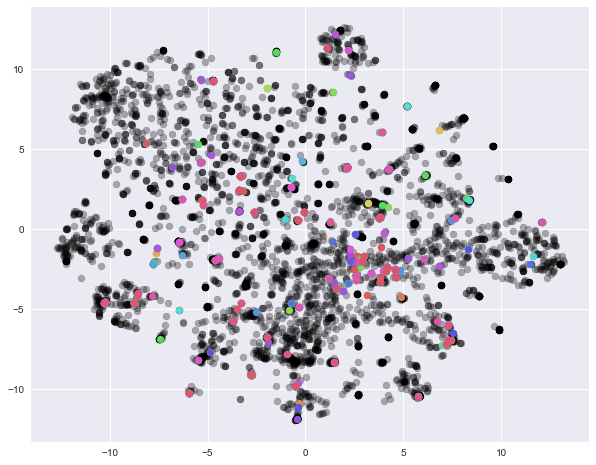

In [99]:
plot_results(reduced_X, clusters_axis0, movies, background = 'valid', results_color = 'cycle', savefig = None)

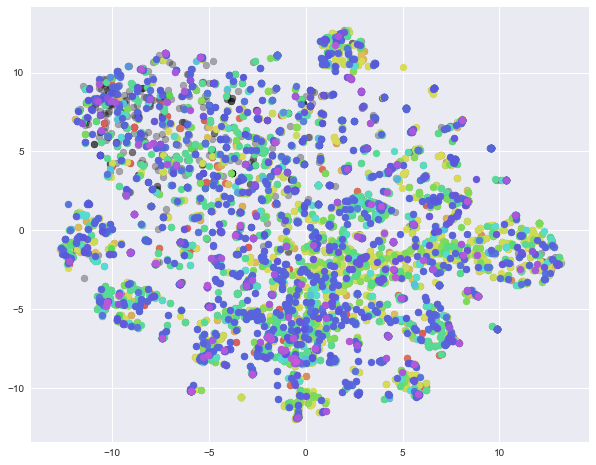

In [87]:
plot_results(reduced_X, clusters_axis1, movies, background = 'valid', results_color = 'cycle', savefig = None)